In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r
from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset
import subprocess

### Rainfall data of observed land-use

ok
ok


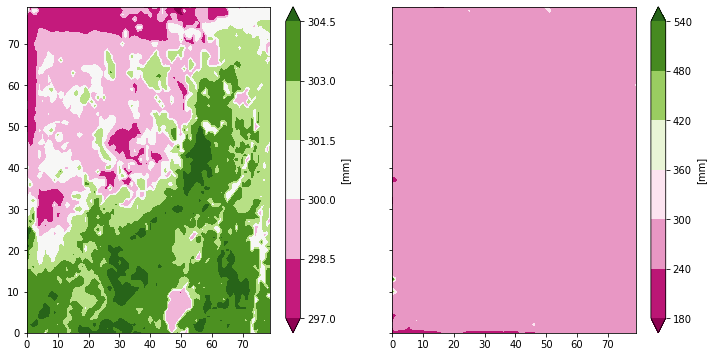

In [21]:
path = '/jet/home/xjliu/Tanguro_exp/'

with xarray.open_dataset(path+'Tanguro201401/3Dfields_d01_2014-01-04_00:00:00',decode_times=True,
                         mask_and_scale='True') as ds:
    #lats = ds['XLAT'][0,:,:]
    #lons = ds['XLONG'][0,:,:]
    print('ok')

file1 = path+'Ini201401_Bdy201408/3Dfields_d01_2014-01-04_00:00:00'
with xarray.open_dataset(file1,decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    

fig,axes = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
#fig.subplots_adjust(wspace=0.275)
axes = axes.ravel()

im0 = axes[0].contourf(ds['TH2'][-1,:,:],cmap='PiYG',extend='both')
im1 = axes[1].contourf(ds1['TH2'][-1,:,:],cmap='PiYG',extend='both')

fig.colorbar(im0,ax=axes[0],label='[mm]')
fig.colorbar(im1,ax=axes[1],label='[mm]')


### CHanges in rainfall: no forests minus forests

ok
ok


Text(0.5, 1.0, 'Ini: 201401, Bdy: 201408')

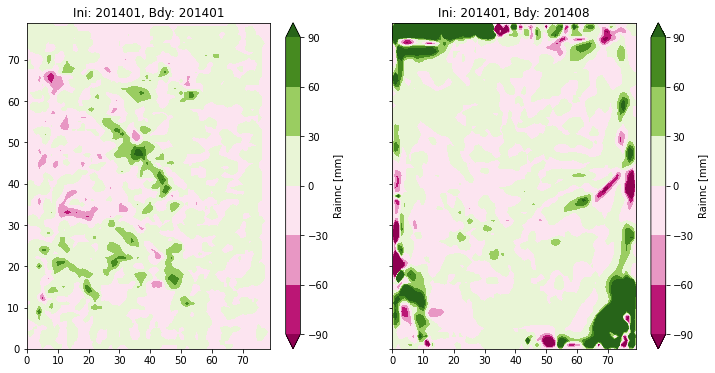

In [9]:
### Ini: 201401, Bdy: 201401
path = '/jet/home/xjliu/Tanguro_exp/'
with xarray.open_dataset(path+'dif_rain_0104_ori.nc',decode_times=False,
                         mask_and_scale='True') as ds:
    #lats = ds['XLAT'][0,:,:]
    #lons = ds['XLONG'][0,:,:]
    print('ok')

### Ini: 201401, Bdy: 201408
with xarray.open_dataset(path+'dif_rain_0104.nc',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')

fig,axes = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
axes = axes.ravel()

im0 = axes[0].contourf(ds['RAINNC'][-1,:,:],cmap='PiYG',extend='both')
im1 = axes[1].contourf(ds1['RAINNC'][-1,:,:],cmap='PiYG',extend='both',levels=np.arange(-90,91,30))

fig.colorbar(im0,ax=axes[0],label='Rainnc [mm]')
fig.colorbar(im1,ax=axes[1],label='Rainnc [mm]')
axes[0].set_title('Ini: 201401, Bdy: 201401')
axes[1].set_title('Ini: 201401, Bdy: 201408')

ok
ok
ok


Text(0.5, 1.0, 'Small Deforestation')

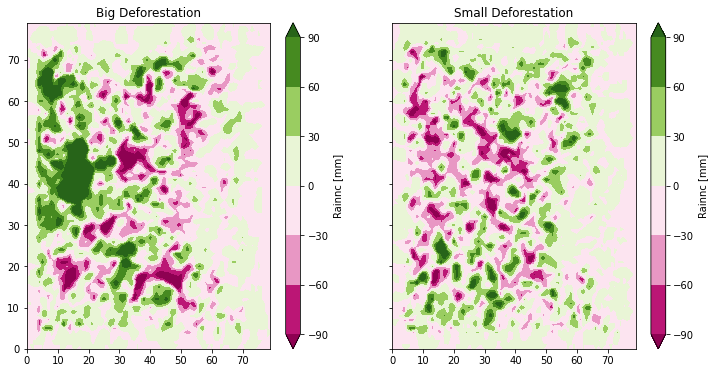

In [4]:
### Observed landuse
path = '/jet/home/xjliu/Tanguro_exp/'
with xarray.open_dataset(path+'Tanguro201401/3Dfields_d01_2014-01-10_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds0:
    #lats = ds['XLAT'][0,:,:]
    #lons = ds['XLONG'][0,:,:]
    print('ok')

### Previous deforestation
with xarray.open_dataset(path+'Tanguro201401_notrees/3Dfields_d01_2014-01-10_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
    
### Deforestation is smaller and more inward
with xarray.open_dataset(path+'Tanguro201401_smallDeforestation/3Dfields_d01_2014-01-10_00:00:00',decode_times=False,
                         mask_and_scale='True') as ds2:
    print('ok')

fig,axes = plt.subplots(1,2,figsize=(12,6),sharex=True,sharey=True)
axes = axes.ravel()

im0 = axes[0].contourf(ds1['RAINNC'][-1,:,:]-ds0['RAINNC'][-1,:,:],cmap='PiYG',extend='both',levels=np.arange(-90,91,30))
im1 = axes[1].contourf(ds2['RAINNC'][-1,:,:]-ds0['RAINNC'][-1,:,:],cmap='PiYG',extend='both',levels=np.arange(-90,91,30))

fig.colorbar(im0,ax=axes[0],label='Rainnc [mm]')
fig.colorbar(im1,ax=axes[1],label='Rainnc [mm]')
axes[0].set_title('Big Deforestation')
axes[1].set_title('Small Deforestation')

### Change in rainfall for the smaller and more inward domain